In [1]:
import json
import sklearn.metrics as skm
from matplotlib import pyplot as plt

#list_metrics = ['mae', 'rmse', 'pearson', 'spearman', 'kendalltau', 'r2_score']
list_metrics = ['mae', 'rmse', 'pearson', 'r2_score']
list_predictor = ['mlp', 'xgb', 'gp_path', 'bananas']
dataset_name = 'so2sat_lcz42_micro'

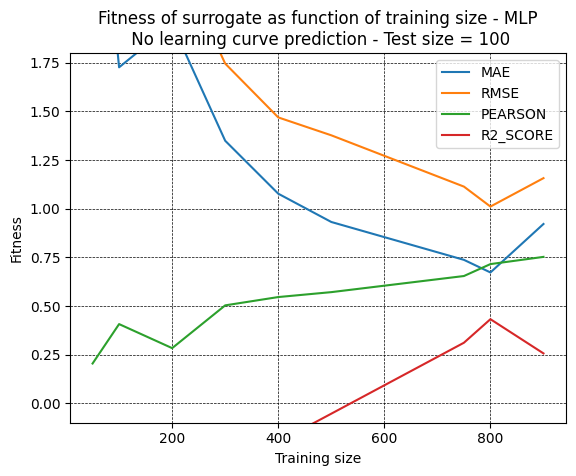

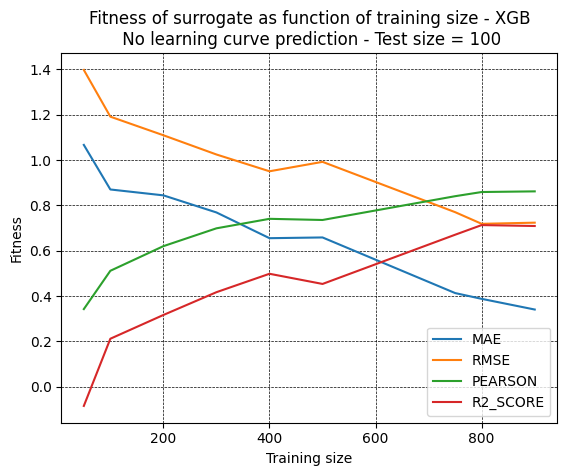

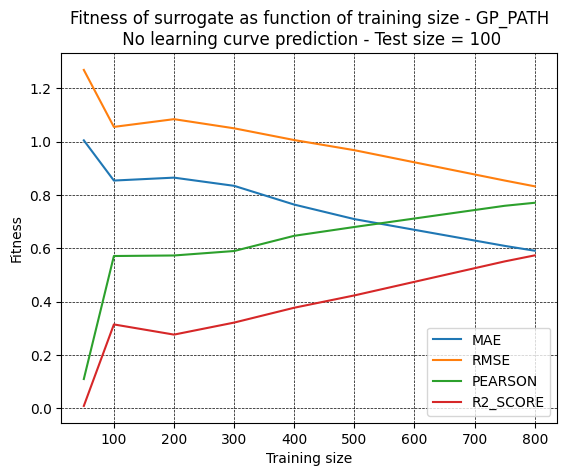

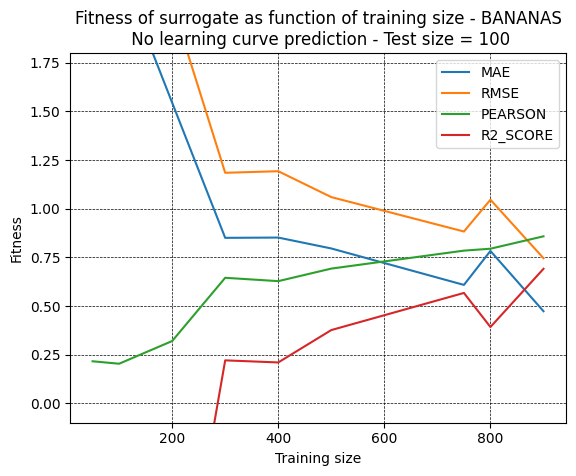

<Figure size 640x480 with 0 Axes>

In [2]:
for predictor_i in list_predictor:

    file_name = '{}/predictors/{}/1000/errors.json'.format(dataset_name, predictor_i)

    with open(file_name, 'r') as json_results:
        file_gp_lcz42 = json.loads(json_results.read())   

    config_exps = file_gp_lcz42[0]
    training_size = None

    if config_exps['experiment_type'] == 'vary_train_size':
        training_size = config_exps['train_size_list']
    elif config_exps['experiment_type'] == 'single':
        training_size =  config_exps['train_size_single']
    else:
        pass



    if not file_gp_lcz42[0]['experiment_type'] == 'single':


        number_of_items = len(training_size)

        dict_all_sizes = dict()
        for idx_i, size_i in enumerate(training_size):

            performance = dict()
            performance['mae'] = file_gp_lcz42[idx_i + 1]['mae']
            performance['rmse'] = file_gp_lcz42[idx_i + 1]['rmse']
            performance['pearson'] = file_gp_lcz42[idx_i + 1]['pearson']
            performance['spearman'] = file_gp_lcz42[idx_i + 1]['spearman']            
            performance['kendalltau'] = file_gp_lcz42[idx_i + 1]['kendalltau']

            r2_score = skm.r2_score(file_gp_lcz42[idx_i + 1]['full_ytest'], 
                                    file_gp_lcz42[idx_i + 1]["full_testpred"])

            performance['r2_score'] = r2_score



            dict_all_sizes[size_i] = performance


    plt.title('Fitness of surrogate as function of training size - ' + predictor_i.upper() 
              + '\n No learning curve prediction - Test size = 100')
    plt.xlabel('Training size')
    plt.ylabel('Fitness')
    
    
    
    plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    for metric_i in list_metrics:
        plt.plot(training_size, [dict_all_sizes[t_i][metric_i] for t_i in training_size], label=metric_i.upper())
    plt.legend(loc='lower right')
    
    if predictor_i in ['mlp', 'bananas']:
        plt.ylim((-0.1, 1.8))
        plt.legend(loc='upper right')
    
    plt.savefig(dataset_name + '_vary_training_size_' +  predictor_i + '.png')
    plt.show()
    plt.clf()

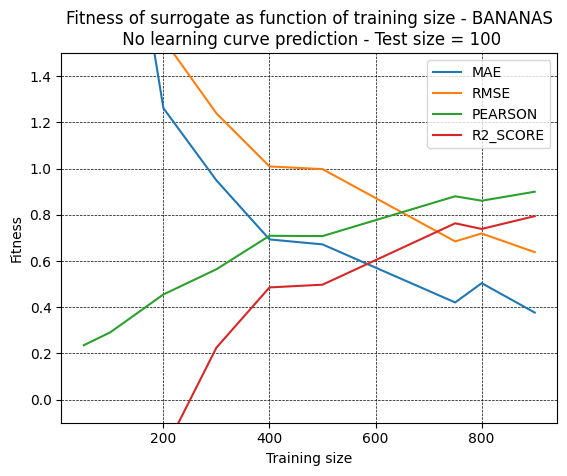

<Figure size 640x480 with 0 Axes>

In [3]:
for predictor_i in ['bananas']:

    file_name = '{}/predictors/{}/2000/errors.json'.format(dataset_name, predictor_i)

    with open(file_name, 'r') as json_results:
        file_gp_lcz42 = json.loads(json_results.read())   

    config_exps = file_gp_lcz42[0]
    training_size = None

    if config_exps['experiment_type'] == 'vary_train_size':
        training_size = config_exps['train_size_list']
    elif config_exps['experiment_type'] == 'single':
        training_size =  config_exps['train_size_single']
    else:
        pass



    if not file_gp_lcz42[0]['experiment_type'] == 'single':


        number_of_items = len(training_size)

        dict_all_sizes = dict()
        for idx_i, size_i in enumerate(training_size):

            performance = dict()
            performance['mae'] = file_gp_lcz42[idx_i + 1]['mae']
            performance['rmse'] = file_gp_lcz42[idx_i + 1]['rmse']
            performance['pearson'] = file_gp_lcz42[idx_i + 1]['pearson']
            performance['kendalltau'] = file_gp_lcz42[idx_i + 1]['kendalltau']
            performance['spearman'] = file_gp_lcz42[idx_i + 1]['spearman'] 

            r2_score = skm.r2_score(file_gp_lcz42[idx_i + 1]['full_ytest'], 
                                    file_gp_lcz42[idx_i + 1]["full_testpred"])

            performance['r2_score'] = r2_score



            dict_all_sizes[size_i] = performance


    plt.title('Fitness of surrogate as function of training size - ' + predictor_i.upper() 
              + '\n No learning curve prediction - Test size = 100')
    plt.xlabel('Training size')
    plt.ylabel('Fitness')
    
    
    
    plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    for metric_i in list_metrics:
        plt.plot(training_size, [dict_all_sizes[t_i][metric_i] for t_i in training_size], label=metric_i.upper())
    plt.legend(loc='lower right')
    
    if predictor_i in ['mlp', 'bananas']:
        plt.ylim((-0.1, 1.5))
        plt.legend(loc='upper right')
    
    plt.savefig(dataset_name + '_vary_training_size_' +  predictor_i + '_other_seed_' + '.png')
    plt.show()
    plt.clf()